### Práctica 4
**José Luis Raya Pérez, Andrés Limón Cruz**.
THC. Semestre 2022-1

In [3]:
#Módulos
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Graficas 3D
import sympy
import random
%matplotlib inline

E1.

In [12]:
#Funciones
def ang(x): #Función para evaluar un angulo mayor o menor a 360 grados
    if x > 360:
        return x%360
    elif x < -360:
        return x%360
    else:
        return x

def cosTay(x,n1): #Funcion para evaluar el valor del coseno de un angulo
    cos = 0
    n = 0
    while (n <= n1):
        cos += (math.pow(-1,n) / math.factorial(2*n)) * math.pow(x,2*n)
        n+= 1
    return(cos)

def rad(x): #Función para convertir de grados a radianes
    x = math.radians(x)
    return x

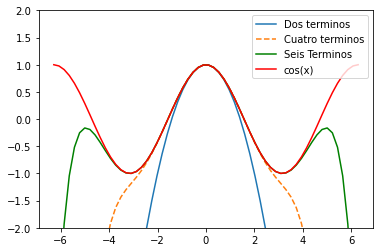

In [13]:
#Script
x = np.linspace(-2*np.pi,2*np.pi,60) #Establezco el valor del dominio de x
x2 = np.cos(x) #Funcion coseno para comparar con los resultados de mi fucnción
plt.plot(x,[cosTay(x1,1) for x1 in x ],"-",label="Dos terminos")
plt.plot(x,[cosTay(x1,3) for x1 in x ],"--",label="Cuatro terminos")
plt.plot(x,[cosTay(x1,5) for x1 in x ],"g",label="Seis Terminos")#Gráficas en base a la funcion cosTay
plt.plot(x,x2,"r",label="cos(x)")
ax = plt.gca()
plt.ylim(-2,2) #Limite de y para mejor apariencia
ax.legend(loc = 'upper right')
plt.show()

E2.

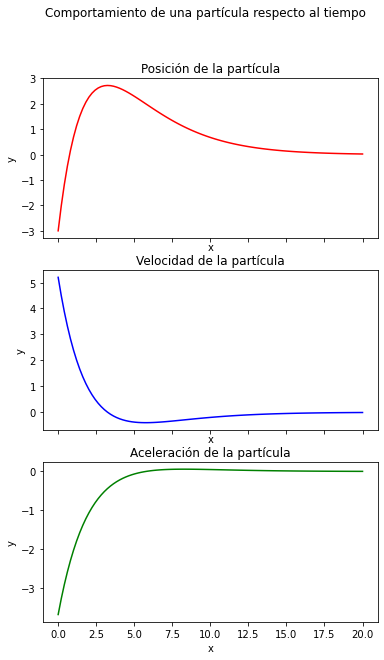

In [71]:
#Script
t = sympy.symbols('t')
a = (-3+4*t)*sympy.exp(-.4*t)       #Definí mi función para despues derivarla en resepcto a t
d = sympy.lambdify(t,(a),'numpy')
f = sympy.lambdify(t,sympy.diff(a),'numpy')
g = sympy.lambdify(t,sympy.diff(a,t,2),'numpy')     

e = np.linspace(0,20,100)    #Hice el inetrvalo para 0 <= t <= 20, con 100 puntos

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True) #Construí las 3 gráficas mediante subplots y las
fig.suptitle('Comportamiento de una partícula respecto al tiempo') #nombré con su respectivo nombre
fig.set_figheight(10)
ax1.plot(e, d(e),'-r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Posición de la partícula')
ax2.plot(e, f(e),'-b')
ax2.set_xlabel('x')
ax2.set_ylabel("y")
ax2.set_title('Velocidad de la partícula')
ax3.plot(e,g(e),'-g')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Aceleración de la partícula')
plt.show()

E3.

<ipython-input-8-051e88517a70>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


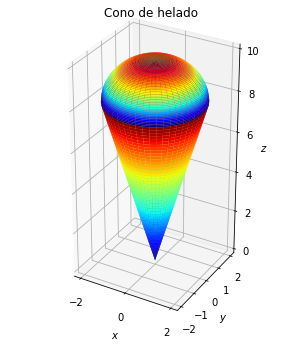

In [8]:
#Script
fig=plt.figure() #Creo la figura, la pongo en formato 3D
ax=Axes3D(fig)
fig.add_axes(ax)
theta=np.linspace(0,2*np.pi) #Creo los intervalos para los valores de theta, phi y el radio
phi=np.linspace(0,np.pi/2)
r=np.linspace(0,2,50)
R,T=np.meshgrid(r,theta) #Creo las mallas
P=np.meshgrid(phi)
x=2*np.cos(T)*np.sin(P) #Pongo las fórmulas paramétricas evaluándolas ya con las mallas
y=2*np.sin(T)*np.sin(P)
z=2*np.cos(P) 
a=R*np.cos(T)
b=R*np.sin(T)
c=4*R
ax.plot_surface(a,b,c,cmap="jet")
ax.plot_surface(x,y,z+8,cmap="jet")
ax.set_xticks([-2,0,2]) #Defino los valores para que aparezcan como la figura de las instrucciones
ax.set_yticks([-2,-1,0,1,2])
ax.set_box_aspect((1,1,2))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("Cono de helado")
plt.show()

E4.

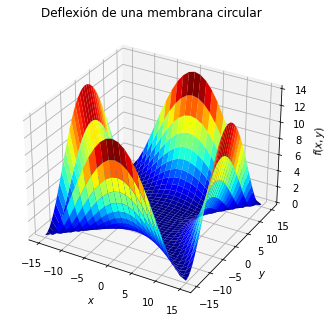

In [15]:
#Script
P = 15
E = 18*10**6
t = 0.08
v = 0.3
K = (E*t**3)/(12*(1-v**2)) #Establezco los valores de las variables para hacer los calculos
fig = plt.figure() #Creo la figura en formato 3D 
ax = Axes3D(fig)
r = np.linspace(-15,15,25)
rd = np.linspace(-15,15,40) #Pongo el mismo intervalo para rd
X,Y = np.meshgrid(r,rd)
w = ((P*Y**4)/(64*K))*(1-(X/Y)**2)**2 #Pongo la formula
ax.plot_surface(X,Y,w,cmap='jet') #Genero la gráfica
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$")
ax.set_title("Deflexión de una membrana circular")
plt.show()

E5.

In [11]:
#Funciones
#Inciso a)
def triSier(n):
    b = np.array([[[0],[0]], [[1/4], [math.sqrt(3)/4]], [[1/2], [0]]]) #Definimos a b como arreglo
    A = np.array([[1/2,0],[0,1/2]]) #Defino A con los valores de su matriz
    v = np.array([[0],[0]])
    x= np.ones(n) #Utilizamos ones para que nos regrese un arreglo de n tamaño
    y= np.ones(n)
    for i in range(len(x)): #Comenzamos el ciclo para los elementos en x
        B= random.choice(b) #Seleccionamos un valor random de B 
        v=np.dot(A,v)+B #Calculamos el producto punto entre matrices
        x[i] = v[0] #Guardamos los valores
        y[i] = v[1]
    return np.array(x),np.array(y) #Regresamos los arreglos con los elementos guardados

a)


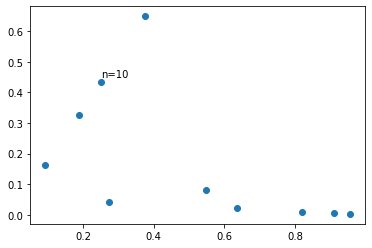

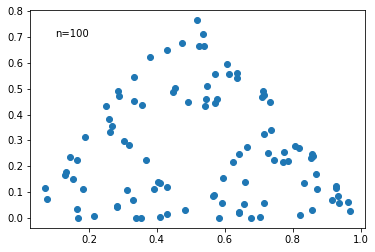

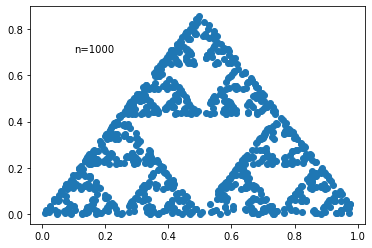

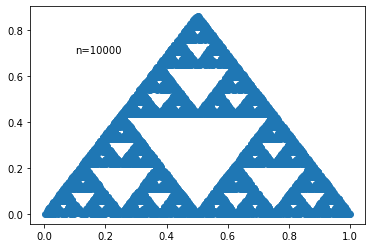

In [21]:
#Script
print("a)")
d= triSier(10)
plt.scatter(d[0],d[1])
plt.text(.25,.45,r"n=10")
plt.show()

e= triSier(100)
plt.scatter(e[0],e[1])
plt.text(.1,.7,r"n=100")
plt.show()

f= triSier(1000)
plt.scatter(f[0],f[1])
plt.text(.1,.7,r"n=1000")
plt.show()

g= triSier(10000)
plt.scatter(g[0],g[1])
plt.text(.1,.7,r"n=10000")
plt.show()

E6.

In [5]:
#Funciones
def linea(xa,ya,xb,yb):
    return plt.plot([xa,xb],[ya,yb]) #Defino la función como la instrucciones
def Curva_von_Koch(xa,ya,xb,yb,n): #Defino la función para la curva
    x=np.ones(n) #Utilizamos ones para que nos regrese un arreglo de n tamaño
    y=np.ones(n)
    if n==0: #Sigo las instrucciones
        return linea(xa,ya,xb,yb)
    elif n>0: 
        xc=xa+(xb-xa)/3
        yc=ya+(yb-ya)/3
        xd=xb-(xb-xa)/3
        yd=yb-(yb-ya)/3
        xe=(xc+xd)*math.cos(math.pi/3)-(yd-yc)*math.sin(math.pi/3)
        ye=(yc+yd)*math.cos(math.pi/3)+(xd-xc)*math.sin(math.pi/3)
        Curva_von_Koch(xa,ya,xc,yc,n-1)
        Curva_von_Koch(xc,yc,xe,ye,n-1)
        Curva_von_Koch(xe,ye,xd,yd,n-1)
        Curva_von_Koch(xd,yd,xb,yb,n-1)
def Copo_von_Koch(xa,ya,xb,yb,xc,yc,n): #Defino la función para el cono
    Curva_von_Koch(xa,ya,xb,yb,n)
    Curva_von_Koch(xb,yb,xc,yc,n)
    Curva_von_Koch(xc,yc,xa,ya,n)

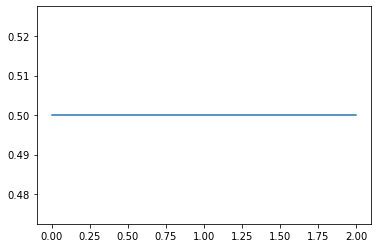

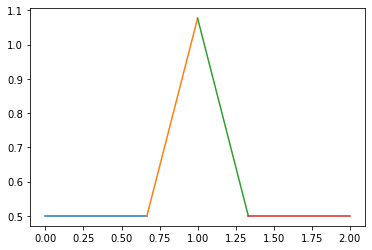

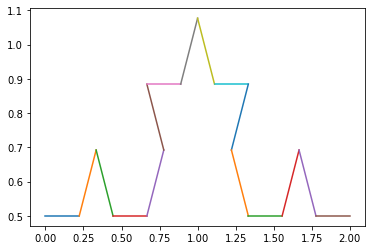

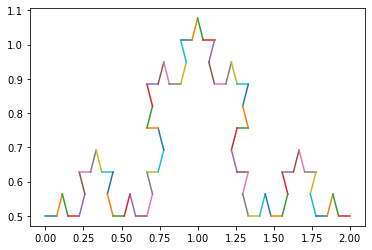

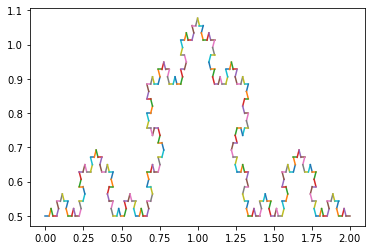

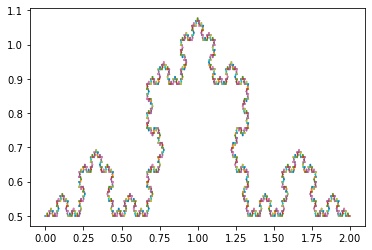

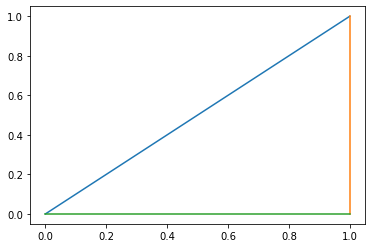

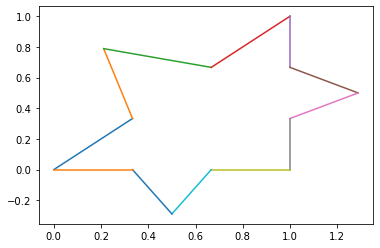

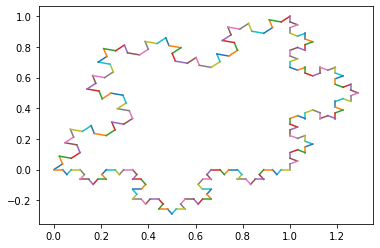

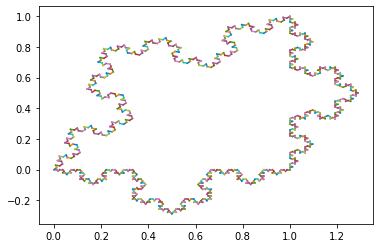

In [8]:
#Script
#Imprimo mis gráficas con valores x, con n el único definido por las instrucciones (el último valor)
Curva_von_Koch(0,.5,2,.5,0)
plt.show()

Curva_von_Koch(0,.5,2,.5,1)
plt.show()

Curva_von_Koch(0,.5,2,.5,2)
plt.show()

Curva_von_Koch(0,.5,2,.5,3)
plt.show()

Curva_von_Koch(0,.5,2,.5,4)
plt.show()

Curva_von_Koch(0,.5,2,.5,5)
plt.show()

Copo_von_Koch(0,0,1,1,1,0,0)
plt.show()

Copo_von_Koch(0,0,1,1,1,0,1)
plt.show()

Copo_von_Koch(0,0,1,1,1,0,3)
plt.show()

Copo_von_Koch(0,0,1,1,1,0,4)
plt.show()

E7.

In [6]:
#Funciones
#Inciso a)
def uncero(f,x1,x2): #Defino mi función basada en la de newton
    while x2-x1 > 0.0001:
        x3=x2 - ((x2-x1)/((f.evalf(subs={x:x2}))-(f.evalf(subs={x:x1}))))*(f.evalf(subs={x:x2}))
        x1=x2
        x2=x3
    return x3

In [7]:
#Script
x,y=sympy.symbols("x y")
f1=x**3+3*x**2 -1
f2=sympy.exp(x)-3*x**2
f3=sympy.sin(x)-sympy.exp(-x)
print("b)")
print("El cero de f1 en el intervalo [-3,-2] es:",uncero(f1,-3,-2))
print("El cero de f2 en el intervalo [0,1] es:",uncero(f2,0,1))
print("El cero de f2 en el intervalo [3,5] es:",uncero(f2,3,5))
print("El cero de f3 en el intervalo [0,1] es:",uncero(f3,0,1))
print("El cero de f3 en el intervalo [3,4] es:",uncero(f3,3,4))
print("El cero de f3 en el intervalo [6,7] es:",uncero(f3,6,7))

b)
El cero de f1 en el intervalo [-3,-2] es: -2.75000000000000
El cero de f2 en el intervalo [0,1] es: 0.780202717105698
El cero de f2 en el intervalo [3,5] es: 3.17215654812664
El cero de f3 en el intervalo [0,1] es: 0.678614100575150
El cero de f3 en el intervalo [3,4] es: 3.10541038316462
El cero de f3 en el intervalo [6,7] es: 6.30053686236389
